In [1]:
from nilearn.datasets import fetch_abide_pcp
from nilearn import plotting
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import torch
import scipy 

from data.ABIDEProcessing import get_subjectIDs, fetch_filenames, \
                             get_timeseries, get_subject_connectivity, ROOT_FOLDER

from utils.visualize import visualization
from data.PhenotypicData import PhenoDataProcessing

from src.build import Adj_matrix

In [2]:
EXEC = False        # Turn to True if you download the dataset for the first time

if EXEC : 
    abide_data_dir = './data/' + 'ABIDE_dataset'       
    num_subjects = 871       # Number of subjects for the ABIDE dataset


    abide_data = fetch_abide_pcp(data_dir = abide_data_dir,
                                n_subjects = num_subjects, 
                                pipeline = 'cpac',
                                derivatives = ['rois_ho'], 
                                quality_checked = True, 
                                verbose = 1,
                                band_pass_filtering = True,
                                global_signal_regression=False)

In [3]:
# Get the subjects IDs
subjectIDs = get_subjectIDs()
# Get the filename associated to each subject
fileNames = fetch_filenames(subject_IDs = subjectIDs)

## Get the time series 
time_series = get_timeseries(subjectIDs, fileNames)

Loading time series: 100%|██████████| 871/871 [00:16<00:00, 52.32it/s]


In [4]:
## Build the connectivity matrix for each subject
for i in tqdm(range(len(subjectIDs)), total = len(subjectIDs), desc = "Saving the connectivity matrices"):
    _ = get_subject_connectivity(time_series[i], subjectID = subjectIDs[i]) 

Saving the connectivity matrices: 100%|██████████| 871/871 [00:03<00:00, 230.25it/s]


$$ \textbf{Visualization of the Time Series and Connectivity Matrix} $$ 

We define
$Sim(S_{v}, S_{w})$ as the correlation distance between the subjects’ rs-fMRI connectivity networks after feature selection, as a separation between ASD and controls
can be observed within certain sites

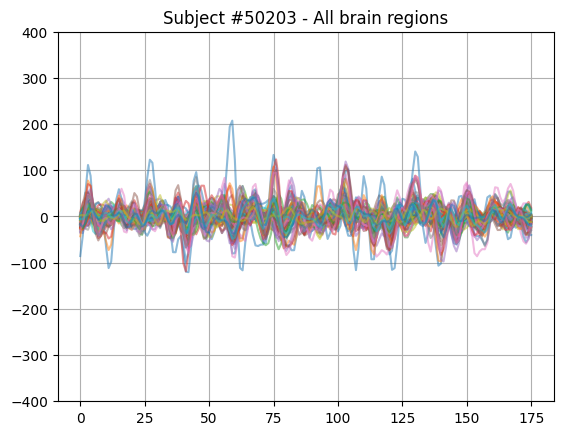

In [5]:
## Setup the visualization class
vis = visualization(subjectIDs = subjectIDs, time_series = time_series, root_folder = ROOT_FOLDER)

# Plot the time series for one subject
vis.plot_ts(idx = 120)

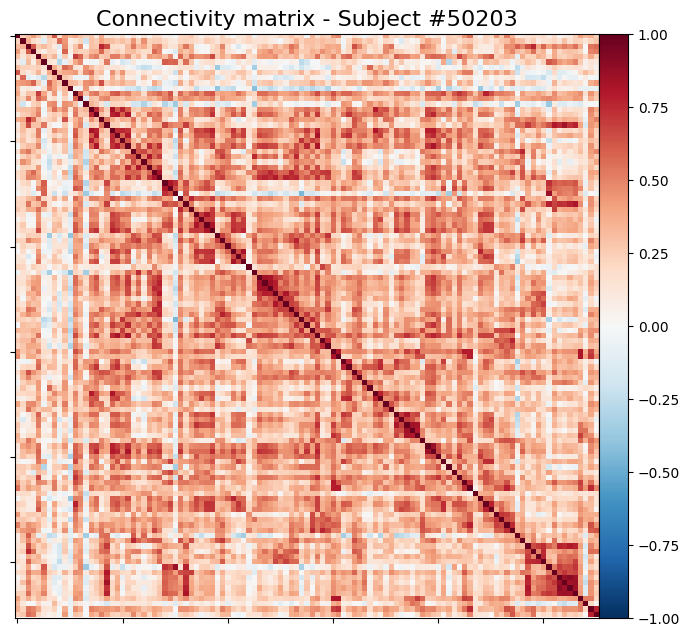

In [6]:
# Visualize the connectivity matrix for one subject
vis.plot_connectivity_matrix(idx = 120)

$$ \textbf{Phenotypic data} $$ 

In [7]:
pdp = PhenoDataProcessing(root_folder = ROOT_FOLDER)

## Extract the phenotypic Dataframe associated to the 871 studied patients
df = pdp.extract_subjects(subjectIDs = subjectIDs)

print(f"The size of the phenotypic DataFrame is {df.shape}")

## First visualization of the DataFrame
df.head()

The size of the phenotypic DataFrame is (871, 106)


,Unnamed: 0.1,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,NaN,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1
5,5,6,50007,6,50007,PITT,Pitt_0050007,1,1,17.78,...,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lob,OK,NaN,OK,NaN,1


$$ \textbf{Adjacency matrix} $$

In [8]:
adj = Adj_matrix(subjectIDs = subjectIDs, root_folder = ROOT_FOLDER, sort_var = ['SITE_ID', 'SEX'])

In [9]:
adjacency_matrix = adj.compute_adjacency_matrix(nb_features = 2000)

Computing the score matrix on the phenotypic features ...


Building Score matrix: 100%|██████████| 871/871 [01:58<00:00,  7.34it/s] 


DONE
Computing the correlation matrix on the similarities ...


Retrieving the connectivity matrices: 100%|██████████| 871/871 [00:11<00:00, 77.15it/s]
c:\Users\yanis\OneDrive\Bureau\M2 MVA\S1\Geometric Data Analysis\MVA-Geometric_Data_Analysis\src\build.py:70: RuntimeWarning: divide by zero encountered in arctanh
  norm_networks = [np.arctanh(mat) for mat in self.all_networks]


Fitting estimator with 6105 features.
Fitting estimator with 6005 features.
Fitting estimator with 5905 features.
Fitting estimator with 5805 features.
Fitting estimator with 5705 features.
Fitting estimator with 5605 features.
Fitting estimator with 5505 features.
Fitting estimator with 5405 features.
Fitting estimator with 5305 features.
Fitting estimator with 5205 features.
Fitting estimator with 5105 features.
Fitting estimator with 5005 features.
Fitting estimator with 4905 features.
Fitting estimator with 4805 features.
Fitting estimator with 4705 features.
Fitting estimator with 4605 features.
Fitting estimator with 4505 features.
Fitting estimator with 4405 features.
Fitting estimator with 4305 features.
Fitting estimator with 4205 features.
Fitting estimator with 4105 features.
Fitting estimator with 4005 features.
Fitting estimator with 3905 features.
Fitting estimator with 3805 features.
Fitting estimator with 3705 features.
Fitting estimator with 3605 features.
Fitting esti

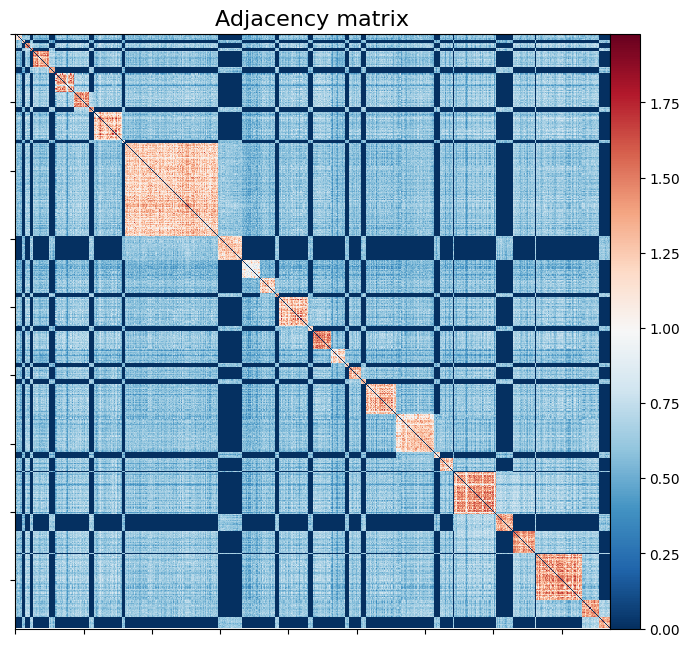

In [10]:
plotting.plot_matrix(adjacency_matrix,
                     title = "Adjacency matrix", 
                     figure = (7,7))
plt.show()

La proportion de patients atteints d'autisme est de 0.4626865671641791
La proportion de patients sains est de 0.5373134328358209


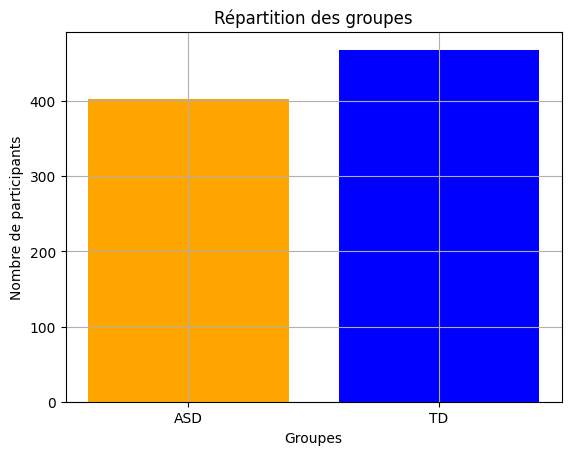

In [11]:
## Comparaison de la répartition des classes (sujets sain et malades)
# DX_GROUP = 1 : Patient atteint d'autisme
# DX_GROUP = 2 : Patient sain
count = df['DX_GROUP'].value_counts()

print(f"La proportion de patients atteints d'autisme est de {count[1]/sum(count)}")
print(f"La proportion de patients sains est de {count[2]/sum(count)}")

plt.bar(count.index, count.values, color=['blue', 'orange'], tick_label=['TD', 'ASD'])
plt.xlabel('Groupes')
plt.ylabel('Nombre de participants')
plt.grid()
plt.title('Répartition des groupes')
plt.show()

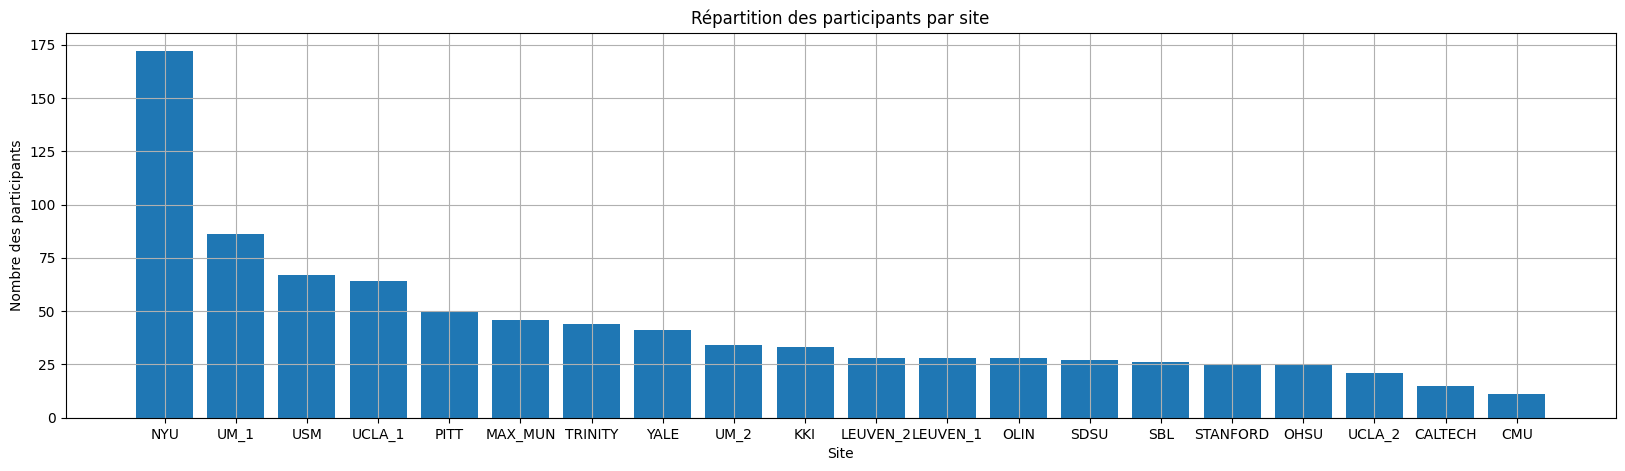

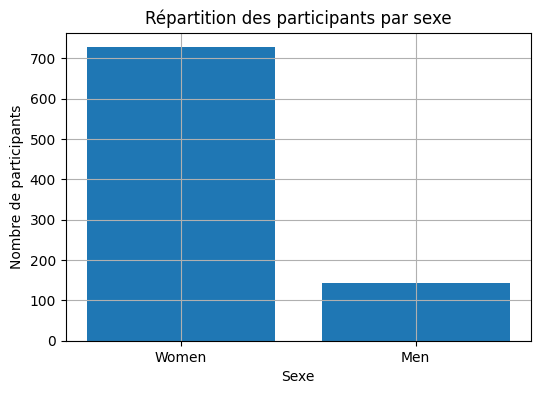

In [12]:
## Réparition des sexes et des sites
count_sex = df['SEX'].value_counts()
count_site = df['SITE_ID'].value_counts()

plt.figure(figsize=(20,5))
plt.bar(count_site.index, count_site.values)
plt.xlabel('Site')
plt.ylabel('Nombre des participants')
plt.grid()
plt.title('Répartition des participants par site')
plt.show()

plt.figure(figsize = (6, 4))
plt.bar(count_sex.index, count_sex.values, tick_label = ['Women', 'Men'])
plt.xlabel('Sexe')
plt.ylabel('Nombre de participants')
plt.grid()
plt.title('Répartition des participants par sexe')
plt.show()

$$ \textbf{Création des ensembles d'entrainement, validation et test} $$ 

In [18]:
from src.gcn import ChebGCN
from src.config import general_settings
from src.pipeline import DataPipeline, TrainTestPipeline

In [23]:
args = general_settings()
data_pipe = DataPipeline(args)

feature_vector = adj.get_feature_vectors()

Retrieving the connectivity matrices: 100%|██████████| 871/871 [00:01<00:00, 797.16it/s]
c:\Users\yanis\OneDrive\Bureau\M2 MVA\S1\Geometric Data Analysis\MVA-Geometric_Data_Analysis\src\build.py:70: RuntimeWarning: divide by zero encountered in arctanh
  norm_networks = [np.arctanh(mat) for mat in self.all_networks]


In [103]:
data_dict = data_pipe.build_data_dict(df, feature_vector, adjacency_matrix)

In [105]:
import torch
import torch.nn as nn
import numpy as np
from utils.preprocess import preprocess_features
from tqdm import tqdm
import torch.nn.functional as func

In [ ]:
class TrainTestPipeline :
    def __init__(self, args, data_dict, model, modelFileName, f_vect_type = "raw_input"):
        super(TrainTestPipeline).__init__()

        # Setup the Pipeline device
        self.device = "cuda" if args.use_cuda else "cpu"

        self.args = args
        self.data_dict = data_dict
        self.f_vect_type = "raw_inputs"

        # Retrieve the number of patients & features
        self.N, self.nb_features = self.data_dict["inputs"][f_vect_type].size()

        # Setup the model 
        self.model = model.to(self.device)
        self.modelFileName = modelFileName

        # Select the inputs 
        self.f_vect_type = f_vect_type

    def get_set_matrix(self, set_id):
        # Initialize a zero matrix of size [N, nb_features]
        mat = torch.zeros([self.N, self.nb_features], dtype = torch.float32).to(self.device)

        # This matrix has the feature vector at rows in set_id, 0 otherwise
        mat[set_id] = self.data_dict["inputs"][self.f_vect_type][set_id]

        return mat
    
    def compute_accuracy(self, logits, set_idx):
        # Pass through a sigmoid to get a probability
        predicted_proba = func.sigmoid(logits[set_idx])

        # Get the predicted label
        pred_labels = (predicted_proba >= 0.5).long()

        # Compute the accuracy
        accuracy = torch.sum((pred_labels == self.data_dict["labels"][set_idx]))/len(set_idx)

        return accuracy


    def NNTrain(self):

        ## Get the matrix associated to training and validation set
        ## + Setup the metrics tensors  :

        # Train set
        train_idx = self.data_dict["train_idx"]
        self.train_set = self.get_set_matrix(set_id = train_idx)
        self.trainLOSS = torch.zeros([self.args.n_epoch])
        self.trainAccuracy = torch.zeros([self.args.n_epoch])
    
        # Validation set
        val_idx = self.data_dict["val_idx"]
        self.val_set = self.get_set_matrix(set_id = val_idx)
        self.valLoss = torch.zeros([self.args.n_epoch])
        self.valAccuracy = torch.zeros([self.args.n_epoch])

        # Use Adam as an optimizer
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr = self.args.lr)
        # Use BCELoss as loss function
        self.loss_fn = nn.BCEWithLogitsLoss()

        for epoch in range(self.args.n_epoch):

            #######################################
            ######### ---- TRAINING ---- ##########
            ####################################### 
            self.model.train()
            # Set the gradients to zero
            self.optimizer.zero_grad()

            # Forward the data through the neural network
            train_logits = torch.squeeze(self.model(self.train_set))

            # Compute the loss then backpropagate
            loss = self.loss_fn(train_logits[train_idx], self.data_dict["labels"][train_idx])
            loss.backward()

            # Save the training loss
            self.trainLOSS[epoch] = loss.item()

            # Update the network parameters 
            self.optimizer.step()

            # Compute and save the training accuracy
            self.trainAccuracy[epoch] = self.compute_accuracy(train_logits, train_idx)

            #######################################
            ######## ---- EVALUATION ---- #########
            ####################################### 
            self.model.eval()

            with torch.no_grad():
                # Forward the validation data through the neural network
                val_logits = torch.squeeze(self.model(self.val_set))

                # Compute and save the loss on the validation set
                val_loss = self.loss_fn(val_logits[val_idx], self.data_dict["labels"][val_idx])
                self.valLoss[epoch] =  val_loss
                
                # Compute and save the accuracy on the validation set
                self.valAccuracy[epoch] = self.compute_accuracy(val_logits, val_idx)
            
            print(f"Epoch {epoch} | Train Loss : {self.trainLOSS[epoch]} | Validation Loss : {self.valLoss[epoch]} | Validation accuracy : {self.valAccuracy[epoch]}")

        torch.save(self.model, self.modelFileName)

        return [self.trainLOSS, self.trainAccuracy, self.valLoss, self.valAccuracy] 
    
    def NNTest(self):
        ## Get the matrix associated to the test set
        self.test_set = self.get_set_matrix(set_id = self.data_dict["test_idx"])

        ## Evaluate the model on the test set and compute the accuracy
        self.model.eval()
        test_logits = torch.squeeze(self.model(self.test_set))
        
        test_accuracy = self.compute_accuracy(test_logits, self.data_dict["test_idx"])

        return test_accuracy

In [ ]:
input_dim = 6105

In [130]:
chebgcn = ChebGCN(args, in_features = input_dim, out_features = 1, adjacency_matrix = data_dict["adjacency_matrix"])

args.lr = 1e-4
args.n_epoch = 1000
Train_test_pipe = TrainTestPipeline(args, data_dict, chebgcn, "chebGCN.pt")

In [131]:
trainLoss, train_accuracy, valLoss, valAccuracy = Train_test_pipe.NNTrain()

Epoch 0 | Train Loss : 0.6930520534515381 | Validation Loss : 0.7067490220069885 | Validation accuracy : 0.540229856967926
Epoch 1 | Train Loss : 0.6870712637901306 | Validation Loss : 0.7236614227294922 | Validation accuracy : 0.540229856967926
Epoch 2 | Train Loss : 0.688938558101654 | Validation Loss : 0.7206084132194519 | Validation accuracy : 0.540229856967926
Epoch 3 | Train Loss : 0.685155987739563 | Validation Loss : 0.7180627584457397 | Validation accuracy : 0.540229856967926
Epoch 4 | Train Loss : 0.6832765340805054 | Validation Loss : 0.7127830982208252 | Validation accuracy : 0.540229856967926
Epoch 5 | Train Loss : 0.6809483170509338 | Validation Loss : 0.7060702443122864 | Validation accuracy : 0.540229856967926
Epoch 6 | Train Loss : 0.6781888604164124 | Validation Loss : 0.7031516432762146 | Validation accuracy : 0.540229856967926
Epoch 7 | Train Loss : 0.6768136620521545 | Validation Loss : 0.7006519436836243 | Validation accuracy : 0.540229856967926
Epoch 8 | Train Lo

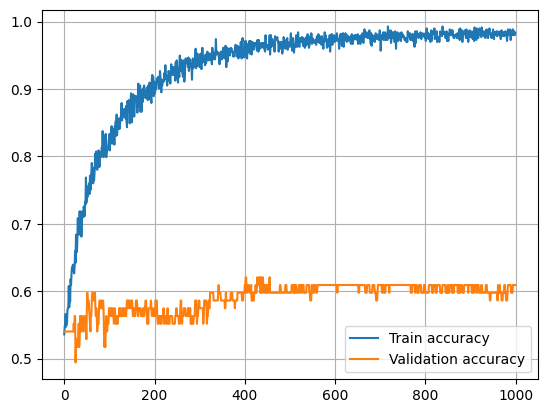

In [134]:
plt.plot(train_accuracy, label = "Train accuracy")
plt.plot(valAccuracy, label = 'Validation accuracy')
plt.legend()
plt.grid()
plt.show()

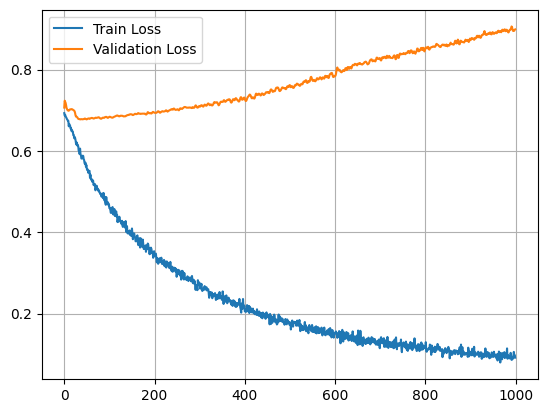

In [135]:
plt.plot(trainLoss, label = 'Train Loss')
plt.plot(valLoss, label = 'Validation Loss')
plt.legend()
plt.grid()
plt.show()
